In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [36]:
def display_img(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=plt.subplot(111)
    ax.imshow(img,cmap="gray")

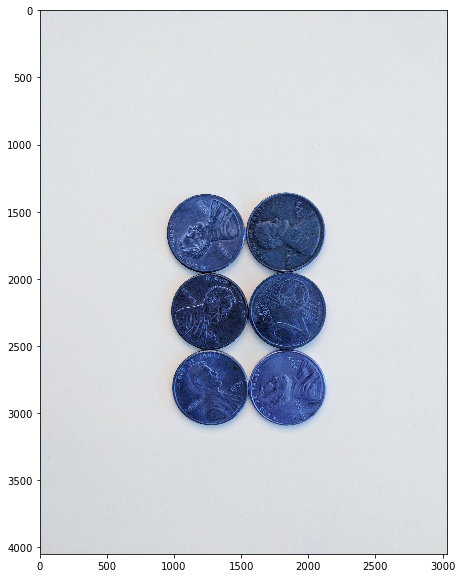

In [3]:
coins=cv2.imread('../DATA/pennies.jpg',)
display_img(coins)

In [4]:
coins_blur=cv2.medianBlur(coins,35)

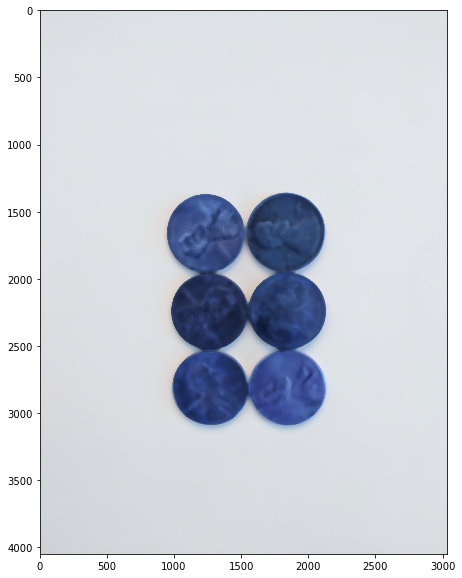

In [5]:
display_img(coins_blur)

In [6]:
coins_=cv2.cvtColor(coins_blur,cv2.COLOR_BGR2GRAY)

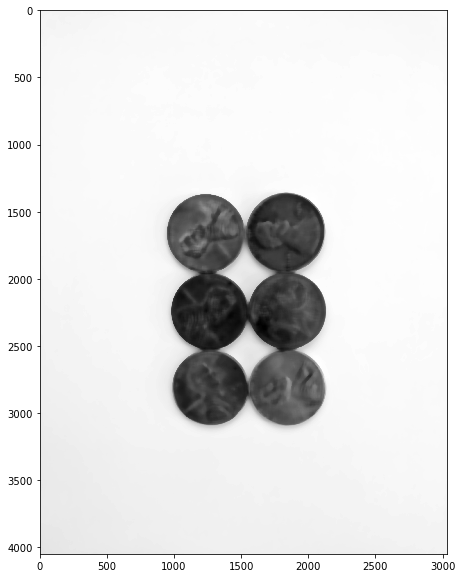

In [7]:
display_img(coins_)

In [20]:
ret,thresh=cv2.threshold(coins_,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

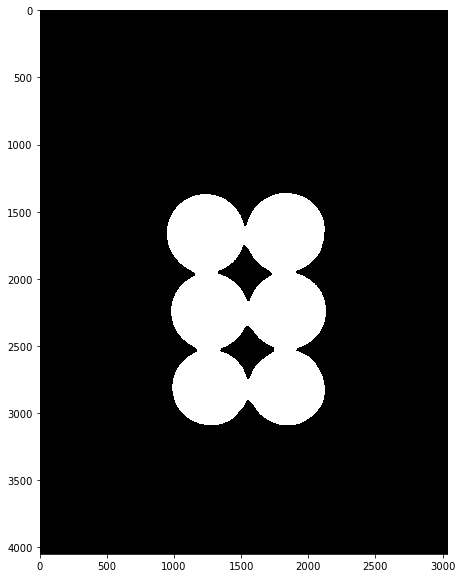

In [60]:
coins_=thresh.copy()
display_img(thresh)


In [22]:
#Morphological processing not required in this particular image

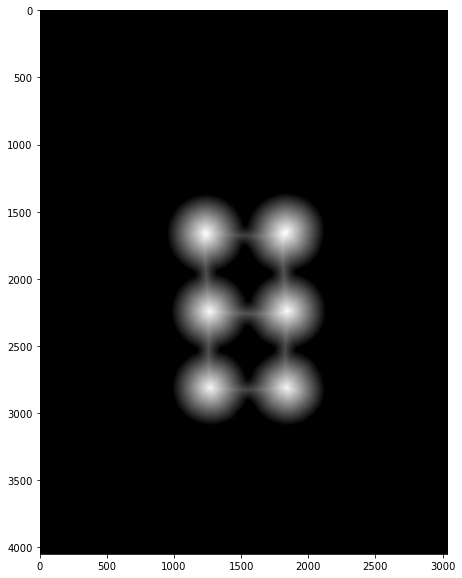

In [33]:
distance_transform=cv2.distanceTransform(thresh,cv2.DIST_L2,5)
display_img(distance_transform)

In [44]:
ret,sure_fg=cv2.threshold(distance_transform,0.7*distance_transform.max(),255,cv2.THRESH_BINARY)

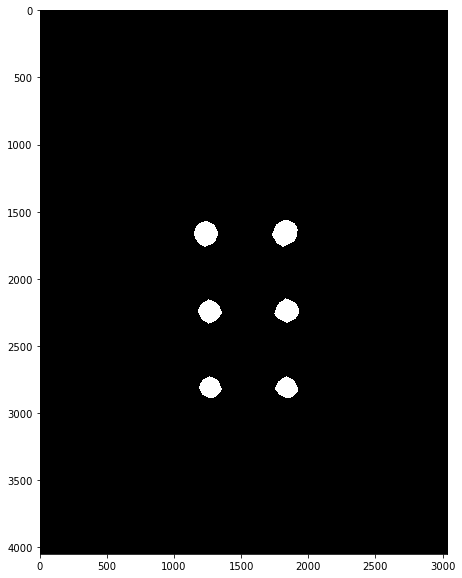

In [45]:
display_img(sure_fg)

In [62]:
sure_fg=np.uint8(sure_fg)

In [63]:
unknown=cv2.subtract(coins_,sure_fg)

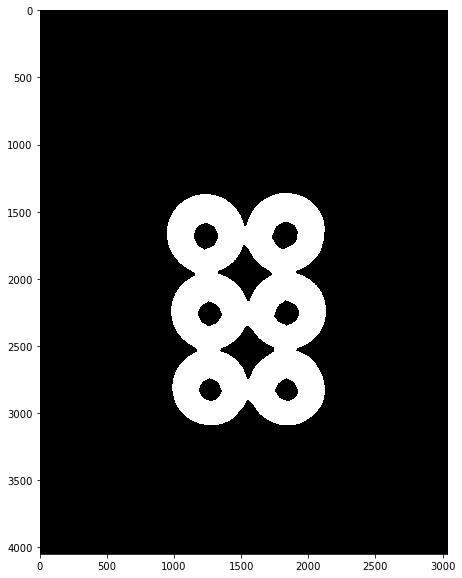

In [64]:
display_img(unknown)

In [69]:
ret,marker=cv2.connectedComponents(sure_fg) # marking the detected segements

In [68]:
ret # detected 7 segements, 6 coins amd 1 backgrounds

7

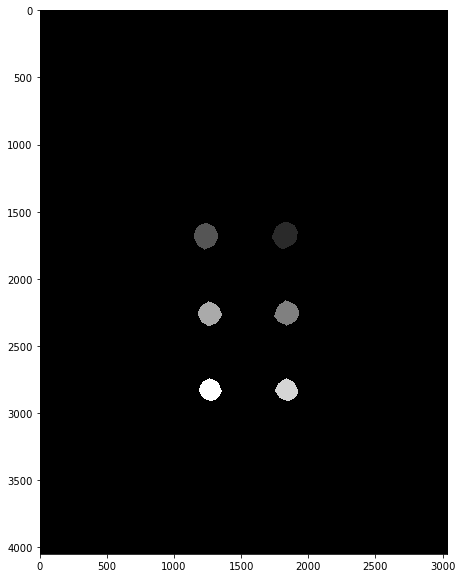

In [67]:
display_img(marker)

In [70]:
marker=marker+1

In [78]:
unknown.max()

255

In [79]:
marker[unknown == 255] =0

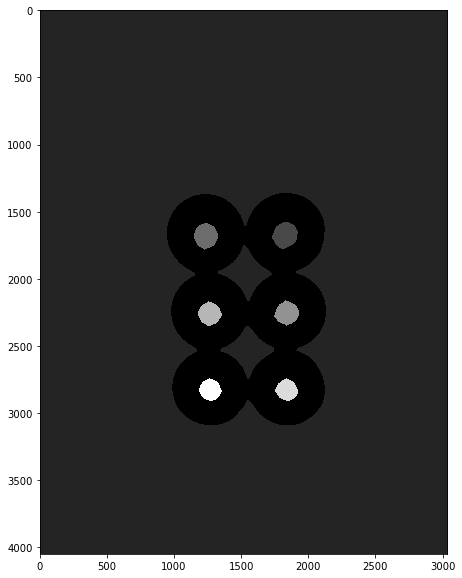

In [80]:
display_img(marker)

In [82]:
result=cv2.watershed(coins,marker)

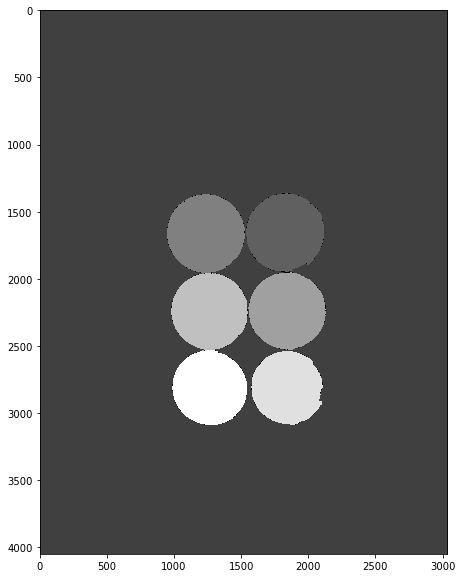

In [83]:
display_img(result)

In [86]:
img,contours,hierarchy=cv2.findContours(result.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [92]:

for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(coins,contours,i,(255,0,0),10)

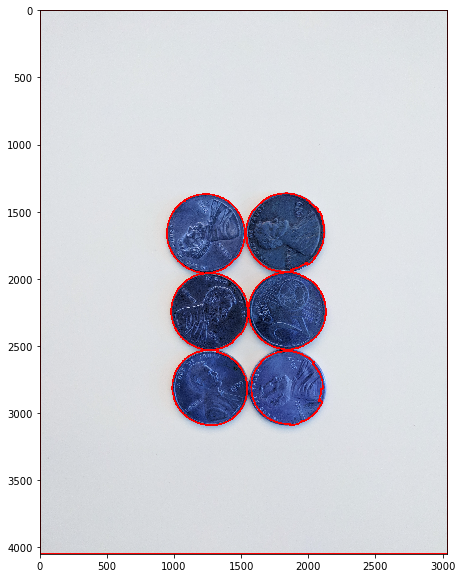

In [93]:
display_img(coins)